Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 4 - Árvore de decisão

---
> 👨‍🏫*Professor Dr. Rooney Coelho (rracoelho@pucsp.br)*
---

### Sobre o exercício
Neste exercício de laboratório, você aprenderá um algoritmo popular de aprendizado de máquina, a árvore de decisão. 

Você usará este algoritmo de classificação para construir um modelo a partir de dados históricos de pacientes e sua resposta a diferentes medicamentos. 

Em seguida, você usa a árvore de decisão treinada para prever a classe de um paciente desconhecido ou para encontrar um medicamento adequado para um novo paciente.

### Sobre o Dataset
Imagine que você seja um pesquisador médico compilando dados para um estudo. Você coletou dados sobre um conjunto de pacientes, todos com a mesma doença. Durante o curso do tratamento, cada paciente respondeu a um dos 5 medicamentos, medicamento A, medicamento B, medicamento c, medicamento X e Y.

Parte do seu trabalho é construir um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com a mesma doença. Os conjuntos de recursos desse conjunto de dados são idade, sexo, pressão arterial e colesterol dos pacientes, e o alvo é o medicamento ao qual cada paciente respondeu.

É um exemplo de classificador binário e você pode usá-lo para construir uma árvore de decisão e, em seguida, usá-la para prever a classe de um paciente desconhecido ou prescrevê-la para um novo paciente.

## Importação dos dados

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

1) Importe o dataset usando o pandas:

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'
df = pd.read_csv(url)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Confira se a importação foi bem sucedida ao executar o método `head()`. 

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Pré-processamento

Declare duas variáveis:
* `X` para as features
* `y` para o target (`Drug`)

2) Preencha o bloco abaixo com um Dataframe para as features somente

In [4]:
X = df.drop('Drug', axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


3) Preencha o bloco abaixo para o target. Use a estrutura Dataset do Pandas para isso

In [5]:
y = df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

4) Como os seus dados são categóricos, é necessário que você transforme seus valores em fatores. Use o método `factorize()` do Pandas para isso. Lembre-se que isso te retornará dois argumentos.

*Obs: faça uma pesquisa sobre como fatorizar todas as colunas categóricas. A intenção dessas atividades também é que você tenha facilidade em realizar esse tipo de pesquisa.*

In [6]:
dic = {}
for col in ('Sex', 'BP', 'Cholesterol'):
    X[col], aux = pd.factorize( X[col] )
    dic[col] = {val: i for i,val in enumerate(aux)}    

In [7]:
dic

{'Sex': {'F': 0, 'M': 1},
 'BP': {'HIGH': 0, 'LOW': 1, 'NORMAL': 2},
 'Cholesterol': {'HIGH': 0, 'NORMAL': 1}}

In [8]:
dic['BP']['LOW']

1

In [9]:
{val: i for i,val in enumerate(dic['BP'])}

{'HIGH': 0, 'LOW': 1, 'NORMAL': 2}

In [10]:
dic['BP'] = {}

In [11]:
X['Sex'].factorize()

(array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0], dtype=int64),
 Int64Index([0, 1], dtype='int64'))

In [12]:
X['Cholesterol']

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Cholesterol, Length: 200, dtype: int64

In [13]:
X['Cholesterol'].unique()

array([0, 1], dtype=int64)

In [14]:
X['Cholesterol'].factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1], dtype=int64),
 Int64Index([0, 1], dtype='int64'))

In [16]:
X['Sex']

0      0
1      1
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    1
199    0
Name: Sex, Length: 200, dtype: int64

In [17]:
y_factor, y_uniques = pd.factorize(y)

print(y_factor, y_uniques)

[0 1 1 2 0 2 0 1 0 0 1 0 0 0 2 0 2 3 1 0 0 0 0 0 0 0 0 2 0 0 2 4 2 0 2 2 3
 2 2 2 0 4 0 2 2 2 3 1 0 0 0 2 0 0 4 1 4 0 2 0 0 3 0 2 4 0 3 2 0 0 4 0 2 0
 0 0 3 0 3 2 4 2 1 3 1 4 2 0 0 0 0 0 0 0 0 2 0 0 0 0 3 3 1 2 0 2 2 0 4 0 3
 2 2 2 2 0 2 2 3 0 0 0 0 0 4 0 0 2 0 2 0 0 2 0 0 2 4 3 4 2 3 0 4 0 3 2 2 3
 2 1 3 4 2 2 0 1 3 0 1 2 2 4 2 0 0 0 0 2 0 3 2 2 0 0 3 0 3 0 0 0 0 2 2 0 0
 0 4 3 0 0 0 3 0 1 0 1 1 2 2 2] Index(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype='object')


## Criação do modelo

Agora que você já converteu as features em valores numéricos (Com excessão da idade e Na_to_K), faça o que se pede.


5) Crie um classificador árvore de decisão e use o argumento `entropy` para o parâmetro `criterion`.

In [18]:
# Criar o modelo
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

6) Treine sua árvore de decisão com a integralidade dos dados.

In [19]:
# Treinar o modelo
clf = model.fit(X,y_factor)

7) Gere um gráfico através do método `plot_tree` use nosso exemplo de sala para se basear (olhem o caderno enviado para vocês).

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

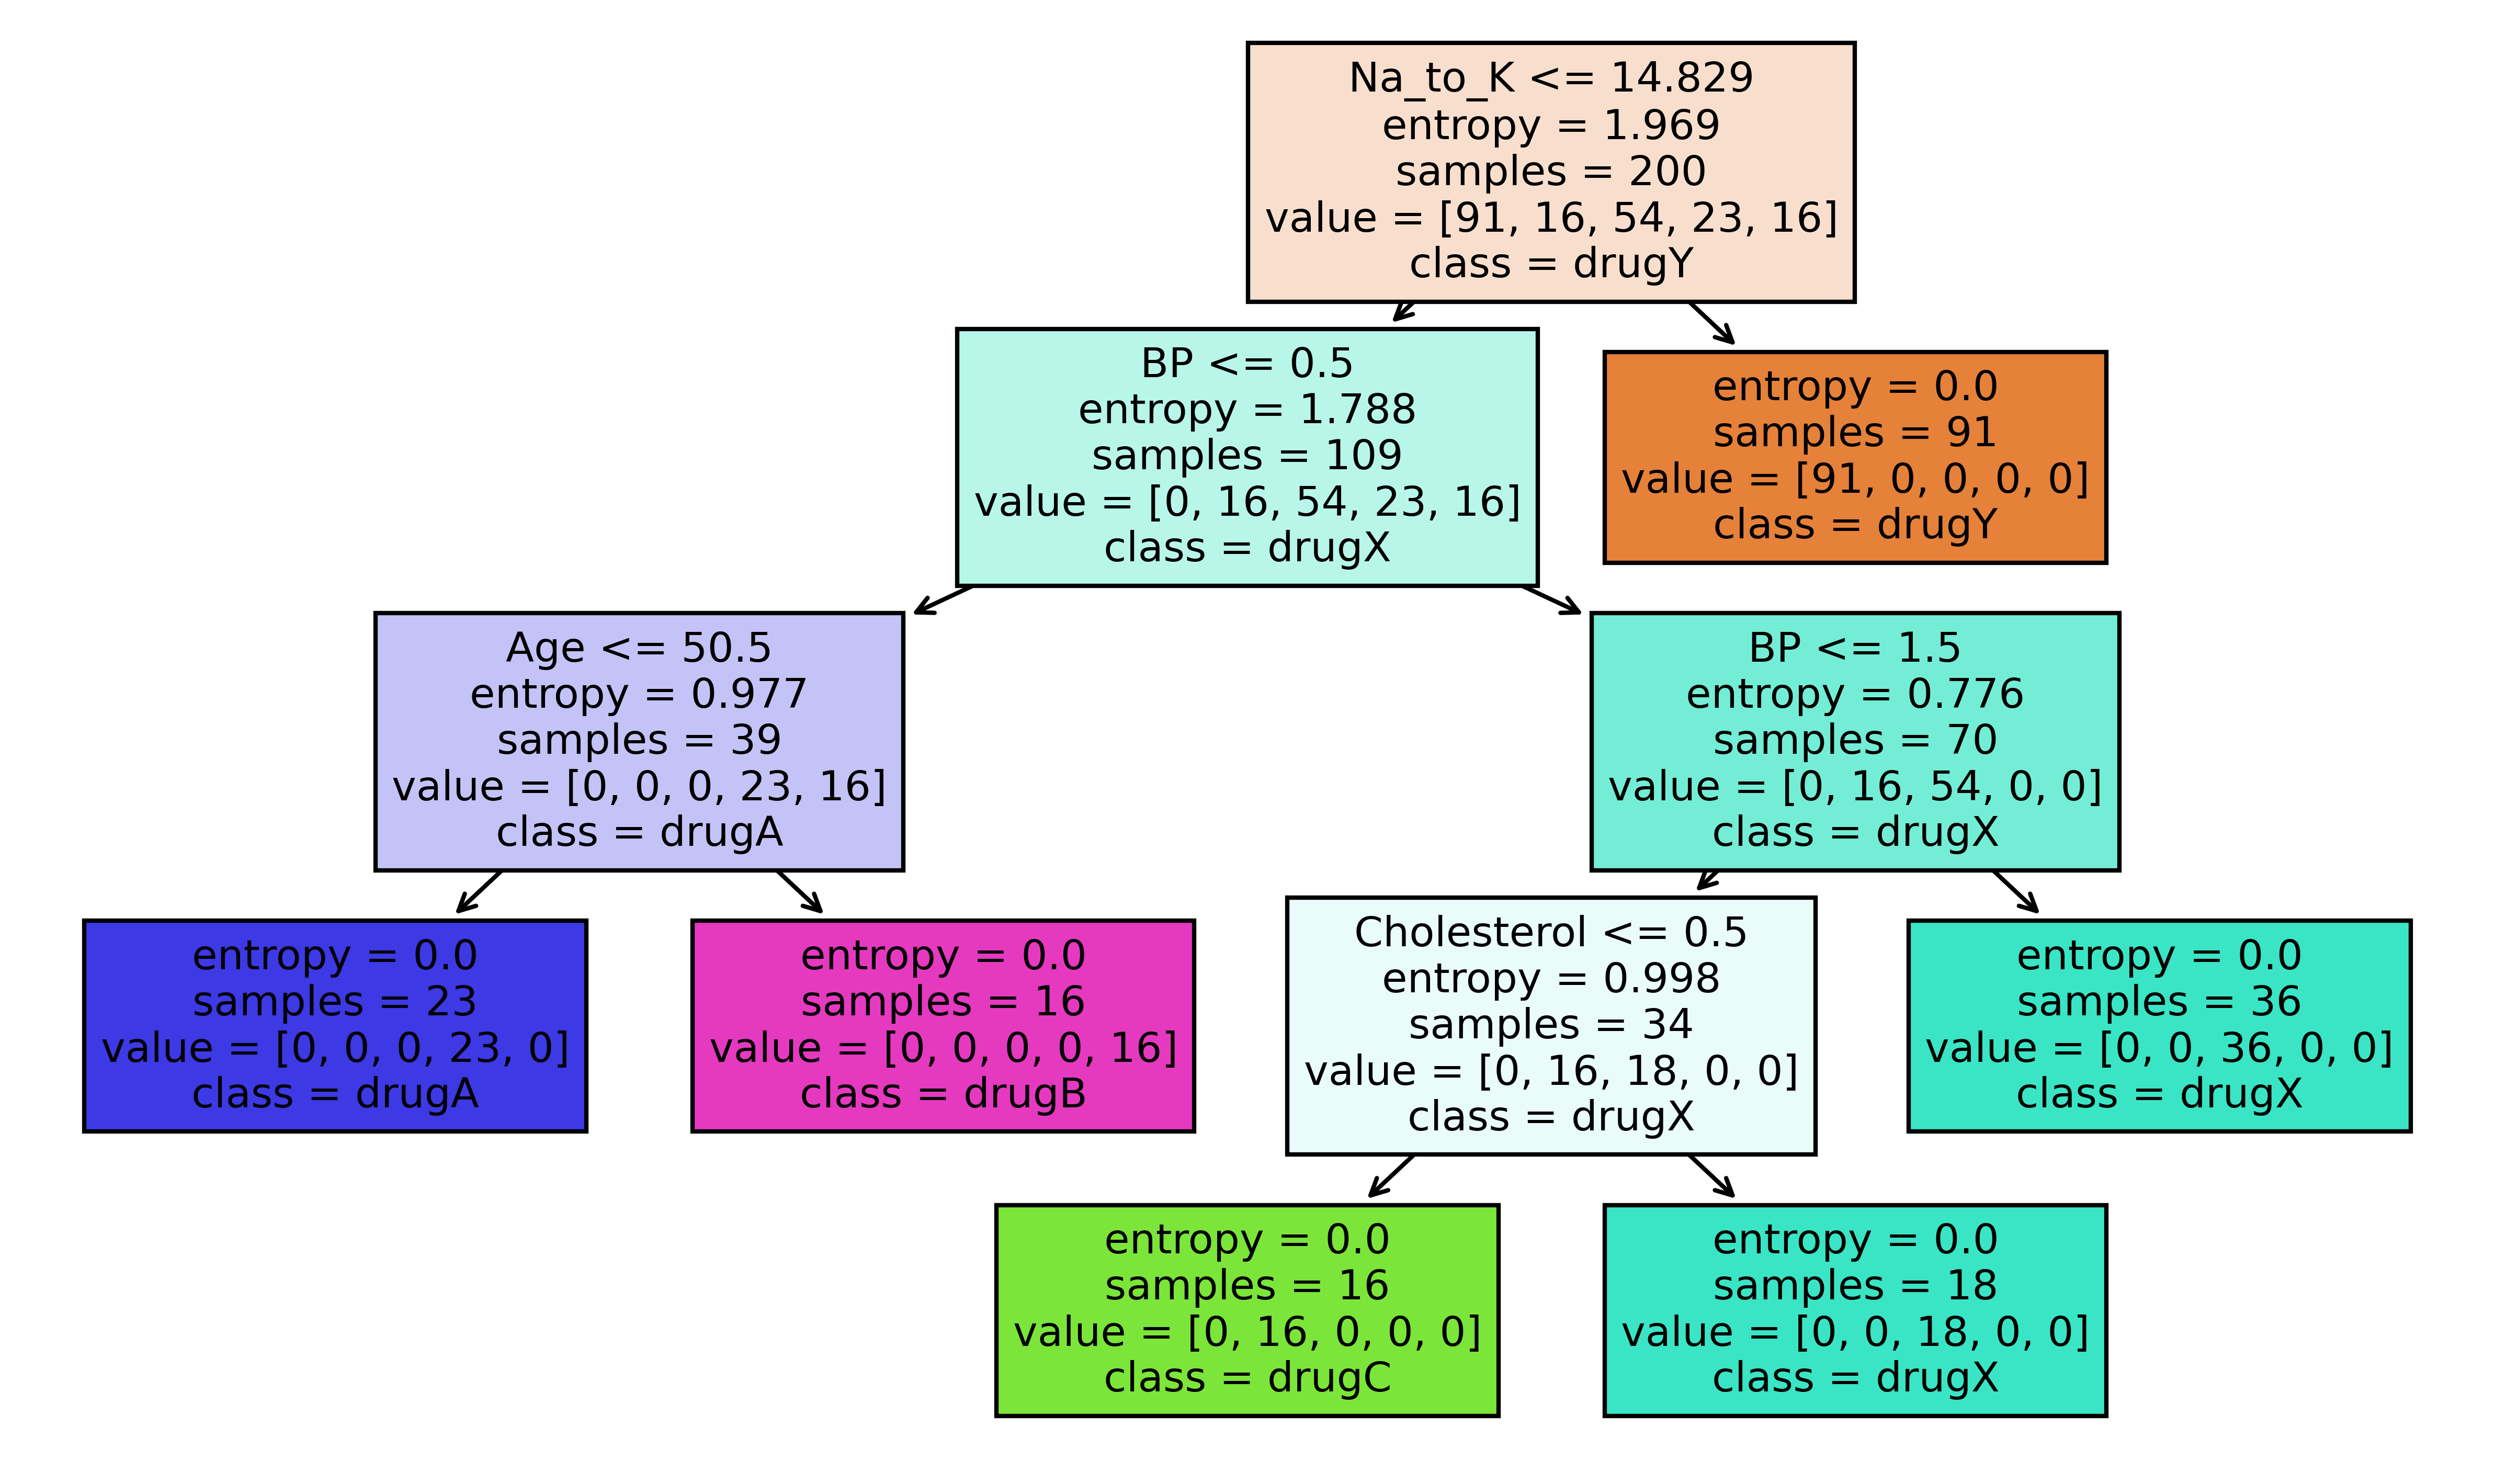

In [20]:
# Gera a figura
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=600)
tree.plot_tree(clf, filled=True, 
                feature_names=X.columns,
                class_names=y_uniques)
fig.savefig('árvore.jpg')

8) Use a árvore de decisão para me indicar (método `predict`) qual remédio tomar:

**Paciente:** 
Rooney Coelho
* Age: 32
* Sexo: M
* BP: NORMAL
* Cholesterol: NORMAL
* Na_to_K: 12

*Obs: Não me passe o medicamento errado!*

In [21]:
clf.predict([[32,1,2,1,12]])

C:\Users\RooneyCoelho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

9) Qual a feature mais importante para a árvore? Eu acho que é o sexo. Estou correto? Use o método `feature_importances_` para justificar seu ponto.

In [22]:
importance = clf.feature_importances_

best =  0

for i,v in enumerate(importance):
  if v > best:
    best = v
    if i == 0:
      j = "Age"
    elif i == 1:
      j = "Sexo"
    elif i == 2:
      j = "BP"
    elif i == 3:
      j = "Cholesterol"
    elif i == 4:
      j = "Na_to_K"
      
print("A feature mais importante é:", j)

A feature mais importante é: Na_to_K


## Segmentação dos dados e Validação do modelo

In [23]:
from sklearn.model_selection import train_test_split

10) Particione os dados em X_test e X_tran para as features e y_train e y_test para os targets. Use a proporção padrão do método `train_test_split` para isso.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_factor)

11) Confira se a quantidade de linhas dos dados para teste e validação são iguais à dos dados antes da particão.

In [25]:
len(X_train)

150

In [26]:
len(X_test)

50

12) Treine o modelo com a partição referente ao treino das features e do target.

In [27]:
# Treinar o modelo
decisionTree = DecisionTreeClassifier()

model = decisionTree.fit(X_train,y_train)

13) Qual é o percentual de acertos do modelo? Utilize a partição dedicada à testes para isso (é perto de 100%)

In [28]:
# Percentual de acertos
accuracy = model.score(X_test, y_test)
print('Percentual de acertos do: %.2f' % (accuracy*100),"%")

Percentual de acertos do: 98.00 %


14) Gere a matriz de confusão para mostrar as classificações incorretas. Use a forma de texto ou gere um gráfico para isso.

C:\Users\RooneyCoelho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


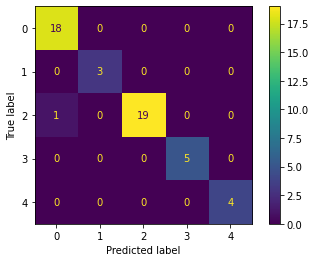

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test, y_test);

**Dica:** Use os dados segmentados para validar o modelo. Depois de confirmar que o modelo atende as espectativas, use a totalidade dos dados para o treinamento. Assim um novo dado a ser checadovai contemplar um modelo treinado com a integralidade dos dados.